In [1]:
%matplotlib inline  
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from dateutil import parser
import datetime
import gc
import sklearn
import matplotlib.pyplot as plt

from IPython.display import clear_output

# Тут рассчет статистик и выбор ключевых слов по ним:

In [18]:
counts_per_class = pd.read_csv('counts_per_class.csv', delimiter='|')
counts_per_class['Total'] = counts_per_class['Up'] + counts_per_class['Down']
counts_per_class = counts_per_class[counts_per_class['Total'] >= 1000]
counts_per_class['pmi_up'] =  (counts_per_class['Up'] / counts_per_class['Total']).apply(np.log)
counts_per_class['pmi_down'] = (counts_per_class['Down'] / counts_per_class['Total']).apply(np.log)
counts_per_class

,Token,Up,Down,Total,pmi_up,pmi_down
0,0000_gmt,471,597,1068,-0.818685,-0.581626
1,0030,628,620,1248,-0.686757,-0.699578
2,0100_gmt,820,803,1623,-0.682727,-0.703677
3,0120,735,762,1497,-0.711348,-0.675272
4,0130_gmt_and,1243,1439,2682,-0.769035,-0.622614
5,0130_jgb_auction,410,723,1133,-1.016467,-0.449215
6,01_01,875,502,1377,-0.453439,-1.009062
7,01_02_03,535,759,1294,-0.883227,-0.533492
8,01_06_07,329,777,1106,-1.212447,-0.353065
9,01_aug_amc,1857,904,2761,-0.396631,-1.116519


In [19]:
top_up = counts_per_class.sort_values(['pmi_up'], ascending=[0])
top_down = counts_per_class.sort_values(['pmi_down'], ascending=[0])
top_down

,Token,Up,Down,Total,pmi_up,pmi_down
36825,conf_11_jan,0,1023,1023,-inf,0.000000
13215,analysts_qtr_eps,0,2099,2099,-inf,0.000000
10539,ago_analysts_qtr,0,2635,2635,-inf,0.000000
91494,no_of_yr,0,2650,2650,-inf,0.000000
79778,latest_no_of,0,2653,2653,-inf,0.000000
71169,index_open_high,0,1127,1127,-inf,0.000000
45753,ece9d8_ece9d8_0cm,0,1161,1161,-inf,0.000000
114516,reports_q2_jun,1,1129,1130,-7.029973,-0.000885
163568,yr_ago_analysts,3,2637,2640,-6.779922,-0.001137
98372,of_yr_ago,4,2660,2664,-6.501290,-0.001503


# Загрузка и обработка данных

In [16]:
course_file = 'course.csv'
change_by_day = dict()
with open(course_file) as fl:
    next(fl)
    for line in fl:
        date_str, day_course_str, change_str = line.strip().split(',')
        change_by_day[datetime.datetime.strptime(date_str, '%Y-%m-%d').date()] = float(change_str)

In [106]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoCV, LassoLarsCV, Lasso
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, cross_val_score
from sklearn.svm import LinearSVC, LinearSVR
from scipy.ndimage.filters import gaussian_filter
from sklearn.metrics import make_scorer, log_loss

In [20]:
top_words = set(top_up['Token'][:10000]) | set(top_down['Token'][:10000])
day_features = []
y_all = []
with open('day_features.csv') as affl:
    all_features = affl.readline().strip().split(',')
    top_index = [word in top_words for word in all_features]
    for line in affl:
        day_features.append([])
        date_str = line.split(',', 1)[0]
        y_all.append(change_by_day[datetime.datetime.strptime(date_str, '%Y-%m-%d').date()])
        for i, val in enumerate(line.strip().split(',')):
            if top_index[i]:
                day_features[-1].append(int(val))
day_features = np.array(day_features)
day_features = normalize(day_features)
y_all = np.array(y_all)
y_sign = np.sign(y_all)

In [25]:
X_train, X_test, y_train, y_test =\
    sklearn.model_selection.train_test_split(day_features, y_sign, test_size=0.1, shuffle=False)

# Простая логрегрессия на фичах с информационным отбором

In [95]:
bcls = LogisticRegression()
params = {
    'C': [10**p for p in range(-7, 8)],
    'penalty': ['l1', 'l2'],
}
grid_cv = GridSearchCV(bcls, params, cv=TimeSeriesSplit(), scoring='neg_log_loss', return_train_score=True,
                       verbose=1, n_jobs=8)
grid_cv.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   16.0s
[Parallel(n_jobs=8)]: Done  90 out of  90 | elapsed:  1.0min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'C': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_log_loss', verbose=1)

In [96]:
cv_result = pd.DataFrame(grid_cv.cv_results_)[['mean_test_score', 'param_C', 'param_penalty']]\
    .sort_values('mean_test_score',ascending=0)
cv_result

,mean_test_score,param_C,param_penalty
0,-0.693147,1e-07,l1
2,-0.693147,1e-06,l1
4,-0.693147,1e-05,l1
6,-0.693147,0.0001,l1
8,-0.693147,0.001,l1
10,-0.693147,0.01,l1
1,-0.693147,1e-07,l2
3,-0.693147,1e-06,l2
5,-0.693150,1e-05,l2
12,-0.693160,0.1,l1


In [97]:
grid_cv.best_estimator_.score(X_test, y_test)

0.53000000000000003

In [76]:
sum([y < 0 for y in y_test]) / len(y_test)

0.53000000000000003

Как видно, результат средненький

# Попытки регрессии

In [8]:
X_train, X_test, y_train, y_test =\
    sklearn.model_selection.train_test_split(day_features, y_all, test_size=0.1, shuffle=False)

Обычная L1 регуляризация

In [111]:
cls = LassoCV(cv=TimeSeriesSplit(), verbose=1, n_jobs=-1)
cls.fit(X_train, y_train)

...................................................................................................................................................../usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
.............................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 42.7min finished


LassoCV(alphas=None, copy_X=True,
    cv=TimeSeriesSplit(max_train_size=None, n_splits=3), eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=-1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=1)

In [112]:
print(cls.score(X_test, y_test), sklearn.metrics.mean_squared_error(cls.predict(X_test), y_test))

-0.00744945074792 1.00382263273


Это почти такое же, но работает быстрее

In [106]:
cls = LassoLarsCV(cv=TimeSeriesSplit(), verbose=1, n_jobs=-1)
cls.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 333 iterations, i.e. alpha=1.933e-03, with an active set of 279 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 430 iterations, i.e. alpha=1.388e-03, with an active set of 320 regressors, and the smallest cholesky pivot element being 2.788e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 430 iterations, i.e. alpha=1.388e-03, with an active set of 320 regressors, and the smallest cholesky pivot

LassoLarsCV(copy_X=True, cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
      eps=2.2204460492503131e-16, fit_intercept=True, max_iter=500,
      max_n_alphas=1000, n_jobs=-1, normalize=True, positive=False,
      precompute='auto', verbose=1)

# Новая эра 1

И тут мне пришла в голову идея, что в зависимости от формулировки задачи, можно чуть изменить кросс-валидацию. Понятно, что мы хотим предсказать показатель $n$ дня, основываясь в основном на новостях для него, или его ближайшей истории: $n-1, n-2$. Тогда обычная кросс-валидация большими пачками не имеет большого смысла: если мне в обучение не попали новости после 1 июля, то мне очень сложно предсказать что-то про 10, т.к. уже война какая-нибудь могла начаться и закончиться, а я про это не знаю.

Будем предсказывать данные только для небольшого участка будущего, используя новости до него:

In [62]:
def get_days_cv(X, start_part=0.5, prediction_days=1, days_step=3):
    start, end = int(len(X) * start_part), len(X) - prediction_days + 1
    test_indexes = list(range(start))
    for test_start in range(start, end, days_step):
        yield test_indexes, list(range(test_start, test_start + prediction_days))
        test_indexes.append(test_start)
        gc.collect()

In [10]:
cls = LassoLarsCV(cv=get_days_cv(X_train, pred_days = 2, days_step=23), verbose=1, n_jobs=-1)
cls.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 96 iterations, i.e. alpha=5.823e-04, with an active set of 94 regressors, and the smallest cholesky pivot element being 2.356e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 96 iterations, i.e. alpha=5.823e-04, with an active set of 94 regressors, and the smallest cholesky pivot element being 2.356e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 96 iterations, i.e. alpha=5.823e-04, with an active set of 94 regressors, and the smallest cholesky pivot eleme

[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 16.4min finished


LassoLarsCV(copy_X=True, cv=<generator object get_days_cv at 0x7fa416fd2a98>,
      eps=2.2204460492503131e-16, fit_intercept=True, max_iter=500,
      max_n_alphas=1000, n_jobs=-1, normalize=True, positive=False,
      precompute='auto', verbose=1)

In [19]:
lassolars_alpha = cls.alpha_

In [27]:
scores = cross_val_score(sklearn.linear_model.LassoLars(alpha=lassolars_alpha, normalize=False),
                         day_features, y_all, cv=get_days_cv(day_features, pred_days=7, days_step=23),
                         n_jobs=6, verbose=1, scoring='r2'
                        )

[Parallel(n_jobs=6)]: Done  44 out of  44 | elapsed:  4.2min finished


In [31]:
print(scores.mean(), scores.std())

-1.42182776924 4.14851711815


In [32]:
ascores = cross_val_score(sklearn.linear_model.LassoLars(alpha=lassolars_alpha, normalize=False),
                         day_features, y_all, cv=get_days_cv(day_features, pred_days=7, days_step=23),
                         n_jobs=6, verbose=1, scoring='neg_mean_squared_error'
                        )

[Parallel(n_jobs=6)]: Done  44 out of  44 | elapsed:  4.2min finished


In [33]:
print(ascores.mean(), ascores.std())

-0.802822561317 2.38857697246


In [34]:
ascores

array([ -0.13544358,  -0.15806508,  -0.2130338 ,  -0.13542711,
        -0.13128951,  -0.04041651,  -0.03539551,  -0.05158862,
        -0.03824112,  -0.1928365 ,  -0.04605329,  -0.4933836 ,
       -15.86063114,  -3.4227284 ,  -1.49764827,  -1.36180642,
        -0.40582541,  -0.42162835,  -0.11324033,  -1.62407901,
        -0.16931556,  -0.89918071,  -0.29589717,  -0.39347183,
        -2.41066538,  -0.70967622,  -0.27262098,  -0.44475789,
        -0.32718781,  -0.3521683 ,  -0.13281811,  -0.18611459,
        -0.17071098,  -0.40130713,  -0.16827149,  -0.17529319,
        -0.13736379,  -0.13220521,  -0.2051952 ,  -0.52988748,
        -0.14328867,  -0.05491314,  -0.16104118,  -0.07207911])

Видно, что регрессия работает не очень.

In [10]:
bin_cls = LogisticRegression(C=10**-4, penalty='l1')
bscores = cross_val_score(bin_cls, day_features, y_sign, cv=get_days_cv(day_features, pred_days=3, days_step=1),
                         n_jobs=6)

array([ 0.33333333,  0.33333333,  0.        ,  0.        ,  0.33333333,
        0.66666667,  1.        ,  0.66666667,  0.33333333,  0.        ,
        0.33333333,  0.66666667,  0.66666667,  0.33333333,  0.        ,
        0.        ,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
        0.66666667,  1.        ,  0.66666667,  0.66666667,  0.33333333,
        0.33333333,  0.33333333,  0.66666667,  0.66666667,  0.33333333,
        0.        ,  0.33333333,  0.66666667,  0.66666667,  0.33333333,
        0.33333333,  0.33333333,  0.66666667,  0.33333333,  0.33333333,
        0.33333333,  0.33333333,  0.33333333,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.33333333,  0.66666667,  0.66666667,  0.66666667,
        0.33333333,  0.33333333,  0.33333333,  0.66666667,  1.        ,
        0.66666667,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
        0.33333333,  0.33333333,  0.33333333,  0.        ,  0.33

Тут я пытался увидеть какую-то закономерность в изменении качества предсказания, но пока все выглядит как "либо предскажет, либо не предскажет". По хорошему, тут надо проверить периодичность для качества предсказаний, возможно, какие-то отдельные периоды мы просто плохо предсказываем (например, стартовые индексы после выходных).

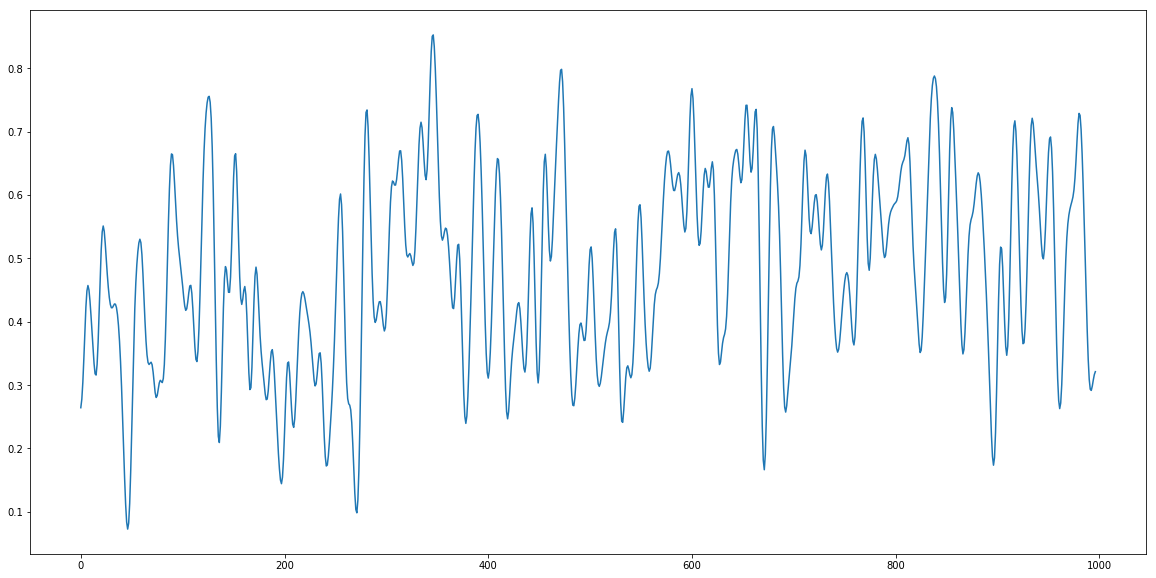

In [19]:
plt.figure(figsize=(20,10))
plt.plot(gaussian_filter(bscores, sigma=3))

In [47]:
print(bscores.mean(), bscores.std())

0.48010698763 0.288278978705


# Новая эра 2

И тут я, наконец-то, вспомнил про понижение размерности, судя по результатам, мне следовало сделать это раньше.

In [9]:
from sklearn.decomposition import TruncatedSVD

In [3]:
all_day_features = []
with open('_df.csv') as fl:
    next(fl)
    for i, line in enumerate(fl):
        all_day_features.append([int(x) for x in line.strip().split(',')])
        if i % 100 == 0:
            clear_output(wait=True)
            print('{:.2%} processed: {}/{}'.format(i / 1997, i, 1997))
            gc.collect()

all_day_features = np.array(all_day_features)

95.14% processed: 1900/1997


In [11]:
svd = TruncatedSVD(n_components=100)
svd_pruned_features = svd.fit_transform(all_day_features)

In [28]:
X_train, X_test, y_train, y_test =\
    sklearn.model_selection.train_test_split(normalize(svd_pruned_features), y_sign, test_size=0.1, shuffle=False)

In [72]:
bcls = LogisticRegression()
params = {
    'C': [10**p for p in range(-7, 8)],
    'penalty': ['l1', 'l2'],
}
grid_cv = GridSearchCV(bcls, params,
                       cv=get_days_cv(X_train, prediction_days=3, days_step=1),
                       scoring=make_scorer(log_loss, greater_is_better=False, labels=[-1.,1.]),
                       return_train_score=False,
                       verbose=1, n_jobs=6)
grid_cv.fit(X_train, y_train)

Fitting 897 folds for each of 30 candidates, totalling 26910 fits


[Parallel(n_jobs=6)]: Done 732 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 6132 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done 13512 tasks      | elapsed:   28.0s
[Parallel(n_jobs=6)]: Done 14944 tasks      | elapsed:  7.8min
[Parallel(n_jobs=6)]: Done 15482 tasks      | elapsed: 11.5min
[Parallel(n_jobs=6)]: Done 16454 tasks      | elapsed: 20.7min
[Parallel(n_jobs=6)]: Done 17104 tasks      | elapsed: 37.4min
[Parallel(n_jobs=6)]: Done 18241 tasks      | elapsed: 45.8min
[Parallel(n_jobs=6)]: Done 19091 tasks      | elapsed: 62.0min
[Parallel(n_jobs=6)]: Done 20041 tasks      | elapsed: 70.5min
[Parallel(n_jobs=6)]: Done 21091 tasks      | elapsed: 86.5min
[Parallel(n_jobs=6)]: Done 22241 tasks      | elapsed: 105.9min
[Parallel(n_jobs=6)]: Done 23491 tasks      | elapsed: 115.6min
[Parallel(n_jobs=6)]: Done 24841 tasks      | elapsed: 135.3min
[Parallel(n_jobs=6)]: Done 26291 tasks      | elapsed: 159.3min
[Parallel(n_jobs=6)]: Done 26910 out of 26910 | elapse

GridSearchCV(cv=<generator object get_days_cv at 0x7f25019762b0>,
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=6,
       param_grid={'C': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=make_scorer(log_loss, greater_is_better=False, labels=[-1.0, 1.0]),
       verbose=1)

In [83]:
grid_cv.best_params_

{'C': 100, 'penalty': 'l1'}

In [94]:
cv_result = pd.DataFrame(grid_cv.cv_results_)[['mean_test_score', 'param_C', 'param_penalty', 'mean_fit_time']]\
    .sort_values('mean_test_score',ascending=0)
cv_result

,mean_test_score,param_C,param_penalty,mean_fit_time
18,-13.605225,100,l1,10.380926
16,-13.772095,10,l1,4.393942
21,-13.797751,1000,l2,0.107322
19,-13.836257,100,l2,0.076838
28,-13.849090,10000000,l1,9.543306
22,-13.861925,10000,l1,9.637608
26,-13.874761,1000000,l1,9.649796
24,-13.874761,100000,l1,9.636723
20,-13.874762,1000,l1,9.750794
29,-13.913266,10000000,l2,0.121755


In [91]:
bin_cls = LogisticRegression(**grid_cv.best_params_)
bscores = cross_val_score(bin_cls, svd_pruned_features, y_sign,
                          cv=get_days_cv(svd_pruned_features, prediction_days=3, days_step=1),
                          n_jobs=6)

In [93]:
print(bscores.mean())
print('Part of the "Up" class:',
      sum(1 for x in y_sign[len(y_sign) // 2:] if x > 0) / (len(y_sign) // 2)
)

0.585088599131
Part of the "Up" class: 0.5210420841683366


Щиикааарные результаты!

Поробуем регрессию:

In [109]:
lasso_cls = Lasso()

params = {
    'alpha': [10**p for p in range(-7, 8)],
}
grid_cv = GridSearchCV(lasso_cls, params,
                       cv=get_days_cv(X_train, prediction_days=3, days_step=1),
                       return_train_score=False,
                       verbose=1, n_jobs=6)
grid_cv.fit(X_train, y_train)

Fitting 897 folds for each of 15 candidates, totalling 13455 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    2.6s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   12.7s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   29.3s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:   52.7s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 11005 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 13455 out of 13455 | elapsed:  2.3min finished


GridSearchCV(cv=<generator object get_days_cv at 0x7f2501e7bb48>,
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=6,
       param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=1)

In [113]:
pd.DataFrame(grid_cv.cv_results_)[['mean_test_score', 'param_alpha']].sort_values('mean_test_score', ascending=False)

,mean_test_score,param_alpha
0,-0.070615,1e-07
1,-0.070621,1e-06
2,-0.070820,1e-05
3,-0.073143,0.0001
4,-0.088321,0.001
5,-0.092105,0.01
6,-0.092105,0.1
7,-0.092105,1
8,-0.092105,10
9,-0.092105,100


In [126]:
lasso_reg = Lasso(**grid_cv.best_params_)
lasso_scores = cross_val_score(lasso_reg, svd_pruned_features, y_all,
                             cv=get_days_cv(svd_pruned_features, prediction_days=3, days_step=1),
                             n_jobs=6)
print(lasso_scores.mean(), lasso_scores.std())

-3.37254624352 23.5064305547


In [124]:
linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, svd_pruned_features, y_all,
                          cv=get_days_cv(svd_pruned_features, prediction_days=3, days_step=1),
                          n_jobs=6)
print(linreg_scores.mean(), linreg_scores.std())

-3.37254630658 23.5064309146


Да что так грустно-то, надо посмотреть на ошибки!

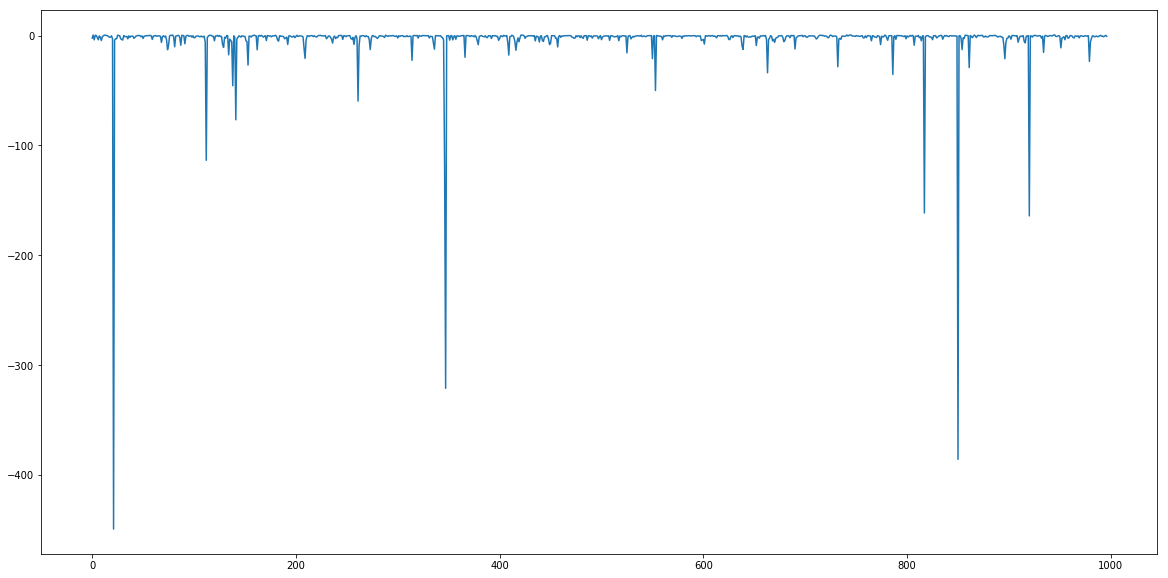

In [149]:
plt.figure(figsize=(20,10))
plt.plot(linreg_scores)

Бе, плохие пики портят все среднее, а если выкинуть худшие $5\%$?

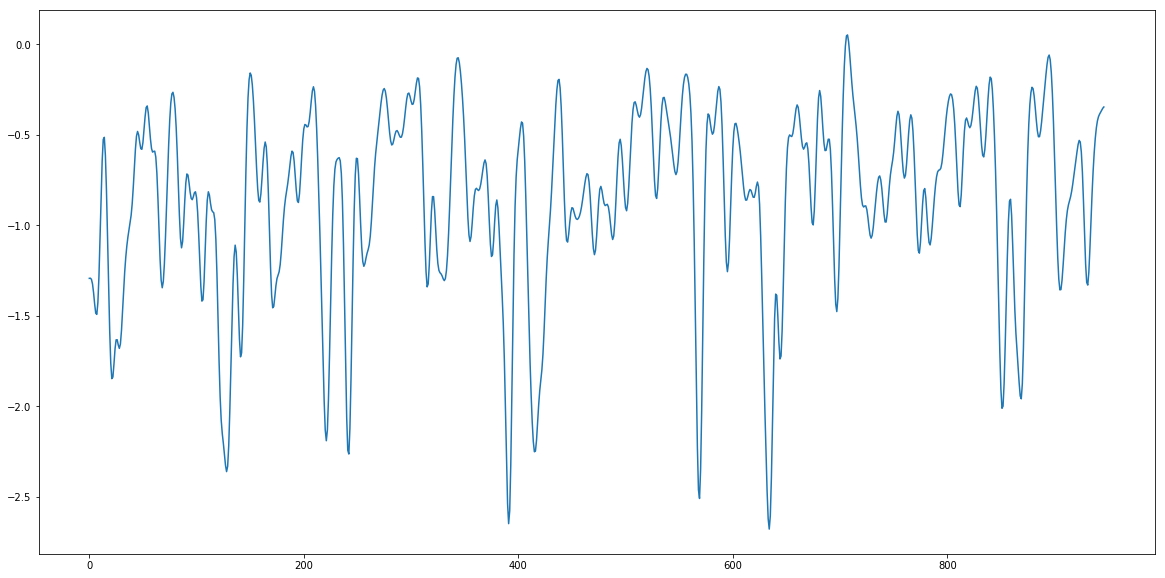

In [153]:
cut_level_percent = 5
down_cut, up_cut = np.percentile(linreg_scores, cut_level_percent),\
    np.percentile(linreg_scores, 100 - cut_level_percent)
plt.figure(figsize=(20,10))
plt.plot(gaussian_filter(linreg_scores[linreg_scores > down_cut], sigma=3))

Все равно $<0$, плохо.

Еще я под конец посмотрел на изменение баланса классов, но пока не придумал, что такое крутое можно по этому скаать.

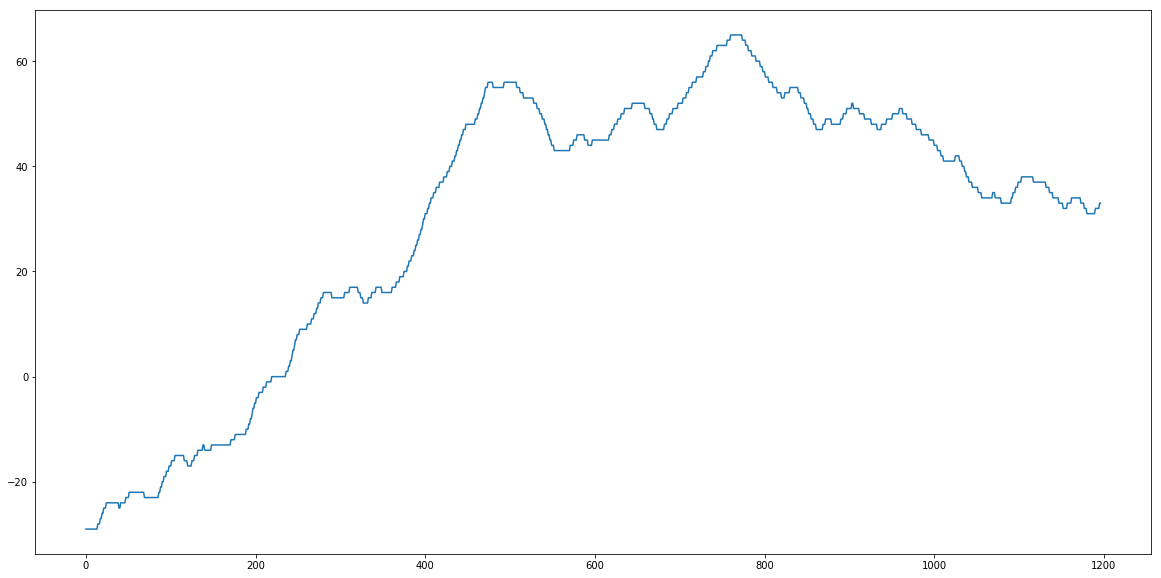

In [56]:
count_rise = np.cumsum([1 if x > 0 else 0 for x in y_sign])
count_fall = np.cumsum([1 if x < 0 else 0 for x in y_sign])

plt.figure(figsize=(20,10))
plt.plot(gaussian_filter(count_rise - count_fall, 5)[800:])